-------------------------------------------
The shape of your data is 92 rows by 3 columns
-------------------------------------------


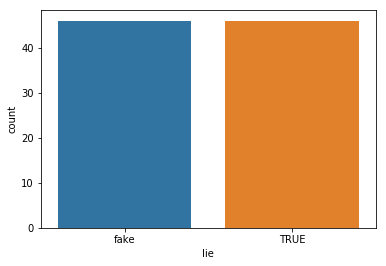

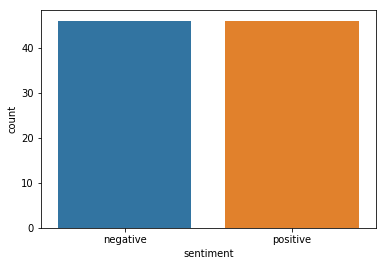

In [1]:
get_ipython().magic('reset -sf') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from IPython import get_ipython
# show images inline
%matplotlib inline
import sys
import os 
#!pip install arff
from scipy.io import arff
from io import StringIO
import seaborn as sns
from __future__ import print_function

from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

import random
random.seed(1)

cwd = os.getcwd()
path = os.listdir(cwd)[2]
data = pd.read_csv(path)
data = data[['lie', 'sentiment', 'review']]
print('-------------------------------------------')
print('The shape of your data is {} rows by {} columns'.format(data.shape[0],data.shape[1]))
print('-------------------------------------------')
sns.countplot(data.lie)
plt.show()

sns.countplot(data.sentiment)
plt.show()

### Starting w/ Sentiment

In [2]:
random_state = 2
lie = data[['lie', 'review']]
x = lie['review']
y = lie['lie']


[0.43090909090909096, 0.41424242424242425]


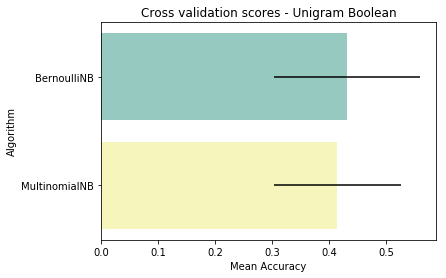

In [3]:
kfold = 5
#Set Test Size to 0.3
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state=2)

unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')
X_train_vec = unigram_bool_vectorizer.fit_transform(xtrain)
X_test_vec = unigram_bool_vectorizer.transform(xtest)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_vec, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["BernoulliNB","MultinomialNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores - Unigram Boolean")
print(cv_means)

[0.43090909090909096, 0.37757575757575756]


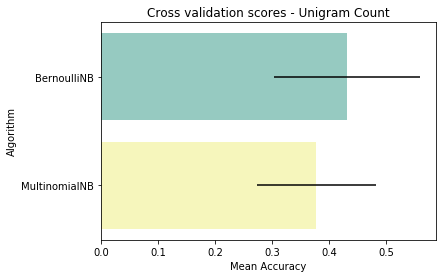

In [4]:
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(xtrain)
X_test_vec = unigram_count_vectorizer.transform(xtest)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_vec, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["BernoulliNB","MultinomialNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores - Unigram Count")
print(cv_means)

[0.43090909090909096, 0.37757575757575756]


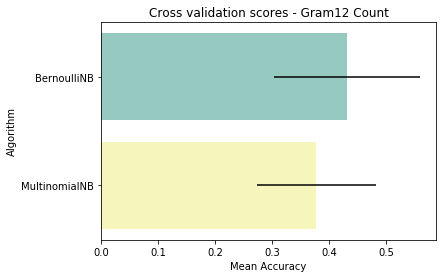

In [5]:
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
X_train_vec = gram12_count_vectorizer.fit_transform(xtrain)
X_test_vec = gram12_count_vectorizer.transform(xtest)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_vec, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["BernoulliNB","MultinomialNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores - Gram12 Count")
print(cv_means)

[0.43090909090909096, 0.35939393939393943]


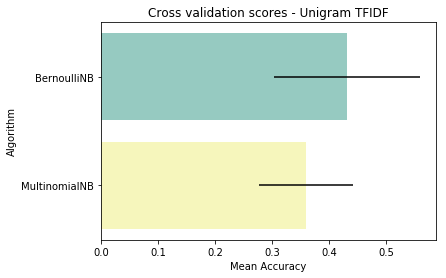

In [6]:
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
X_train_vec = unigram_tfidf_vectorizer.fit_transform(xtrain)
X_test_vec = unigram_tfidf_vectorizer.transform(xtest)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_vec, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["BernoulliNB","MultinomialNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores - Unigram TFIDF")
print(cv_means)

### Garbage. practicing w/ pipelines. 

In [7]:
#https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines

unigram_count_vec = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')
unigram_count_vecdf10 = CountVectorizer(encoding='latin-1', binary=False, min_df=10, stop_words='english')
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,10), min_df=5, stop_words='english')

lst = [unigram_count_vec, unigram_tfidf_vectorizer, unigram_bool_vectorizer, bigram_count_vectorizer]

Bern_nb = BernoulliNB()
Multi_NB = MultinomialNB()

mb_results= []
nb_results = []


for i in lst:
    xtrain_vec = i.fit_transform(xtrain)
    xtest_vec = i.transform(xtest)
    Multi_NB.fit(xtrain_vec, ytrain)
    Bern_nb.fit(xtrain_vec,ytrain)
    mb_results.append(Multi_NB.score(xtest_vec, ytest))
    nb_results.append(Bern_nb.score(xtest_vec, ytest))
    

mb_names = ['Unigram Count + MNB + mindf = 5 + stopwords = English',
            'Unigram Count + MNB + mindf = 10 + stopwords = English',
        'Unigram TFIDF + MNB + mindf = 5 + stopwords = English',
        'Unigram Boolean + MNB + mindf = 5 + stopwords = English',
        'ngram Count + MNB + mindf = 5 + stopwords = English', ]

bern_names = ['Unigram Count + Bern_NB + mindf = 5 + stopwords = English',
              'Unigram Count + Bern_NB + mindf = 10 + stopwords = English',
        'Unigram TFIDF + Bern_NB + mindf = 5 + stopwords = English',
        'Unigram Boolean + Bern_NB + mindf = 5 + stopwords = English',
        'ngram Count + Bern_NB + mindf = 5 + stopwords = English', ]
    
dictionary_mb = dict(zip(mb_names, mb_results))
dictionary_nb = dict(zip(bern_names, nb_results))

dictionary_mb
dictionary_nb
z = {**dictionary_mb, **dictionary_nb}
z

{'Unigram Boolean + Bern_NB + mindf = 5 + stopwords = English': 0.5675675675675675,
 'Unigram Boolean + MNB + mindf = 5 + stopwords = English': 0.5405405405405406,
 'Unigram Count + Bern_NB + mindf = 10 + stopwords = English': 0.5675675675675675,
 'Unigram Count + Bern_NB + mindf = 5 + stopwords = English': 0.5675675675675675,
 'Unigram Count + MNB + mindf = 10 + stopwords = English': 0.4594594594594595,
 'Unigram Count + MNB + mindf = 5 + stopwords = English': 0.5405405405405406,
 'Unigram TFIDF + Bern_NB + mindf = 5 + stopwords = English': 0.5675675675675675,
 'Unigram TFIDF + MNB + mindf = 5 + stopwords = English': 0.5135135135135135}

In [8]:
pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer()),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer()),
                     ('classifier', MultinomialNB())])

pipeline1_stopwords_CountVec_MNB = Pipeline([('stopwords_CountVec_MNB', CountVectorizer(stop_words='english')),
                     ('classifier', MultinomialNB())])

pipeline_stopwords_TFIDF_MNB = Pipeline([('stopwords_TFIDF_MNB', TfidfVectorizer(stop_words='english')),
                     ('classifier', MultinomialNB())])

pipeline_default_CountVec_Boolean_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer(binary = True)),
                     ('classifier', MultinomialNB())])


pipeline_default_CountVec_Bern = Pipeline([('default_CountVec_MNB', CountVectorizer()),
                     ('classifier', BernoulliNB())])

pipeline_default_TFIDF_Bern = Pipeline([('default_TFIDF_MNB', TfidfVectorizer()),
                     ('classifier', BernoulliNB())])

pipeline1_stopwords_CountVec_Bern = Pipeline([('stopwords_CountVec_MNB', CountVectorizer(stop_words='english')),
                     ('classifier', BernoulliNB())])

pipeline_stopwords_TFIDF_Bern = Pipeline([('stopwords_TFIDF_MNB', TfidfVectorizer(stop_words='english')),
                     ('classifier', BernoulliNB())])


def fit_transform_score(x, name ):
    x.fit(xtrain, ytrain)
    return  ('{} ------- Holdout Score: {}%'.format(name, np.round(x.score(xtest, ytest), 2)))

print('--------------------------------------------------------')
print('Testing Stopword Removal against MNB and Bernoulli')
print('--------------------------------------------------------')
print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB'))
print(fit_transform_score(pipeline1_stopwords_CountVec_MNB, 'MNB Countvec Stopwords = English'))
print(fit_transform_score(pipeline_stopwords_TFIDF_MNB, 'MNB TFIDF Stopwords = English'))
print(fit_transform_score(pipeline_stopwords_TFIDF_MNB, 'MNB Boolean CountVec Stopwords = English'))

print(fit_transform_score(pipeline_default_CountVec_Bern, 'Default CountVec Bernoulli'))
print(fit_transform_score(pipeline_default_TFIDF_Bern, 'Default TFIDF Bernoulli'))
print(fit_transform_score(pipeline1_stopwords_CountVec_Bern, 'Stopwords = Bernoulli'))
print(fit_transform_score(pipeline_stopwords_TFIDF_Bern, 'TFIDF Stopwords = Bernoulli'))
print('--------------------------------------------------------')

print('--------------------------------------------------------')
print('Variations of Best two vectorizers')
print('--------------------------------------------------------')

pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer(min_df= 5)),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer(min_df= 5)),
                     ('classifier', MultinomialNB())])

print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB minDF = 5'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB minDF = 5'))
pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer(min_df= 10)),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer(min_df= 10)),
                     ('classifier', MultinomialNB())])

print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB minDF = 10'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB minDF = 10'))


print('--------------------------------------------------------')
print('Variations of Best two vectorizers')
print('--------------------------------------------------------')


pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer(encoding='latin-1')),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer(encoding='latin-1')),
                     ('classifier', MultinomialNB())])

print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB encoding = latin'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB encoding = latin'))

pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer()),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer()),
                     ('classifier', MultinomialNB())])

print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB encoding = utf-8'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB encoding = utf-8'))

print('--------------------------------------------------------')
print('Variations of Best two vectorizers')
print('--------------------------------------------------------')

pipeline_default_CountVec_MNB = Pipeline([('default_CountVec_MNB', CountVectorizer(ngram_range=(1, 5))),
                     ('classifier', MultinomialNB())])

pipeline_default_TFIDF_MNB = Pipeline([('default_TFIDF_MNB', TfidfVectorizer(ngram_range=(1, 5))),
                     ('classifier', MultinomialNB())])

print(fit_transform_score(pipeline_default_CountVec_MNB, 'Default CountVec MNB ngram_range=(1, 5)'))
print(fit_transform_score(pipeline_default_TFIDF_MNB, 'Default TFIDF MNB ngram_range=(1, 5)'))

--------------------------------------------------------
Testing Stopword Removal against MNB and Bernoulli
--------------------------------------------------------
Default CountVec MNB ------- Holdout Score: 0.49%
Default TFIDF MNB ------- Holdout Score: 0.43%
MNB Countvec Stopwords = English ------- Holdout Score: 0.54%
MNB TFIDF Stopwords = English ------- Holdout Score: 0.43%
MNB Boolean CountVec Stopwords = English ------- Holdout Score: 0.43%
Default CountVec Bernoulli ------- Holdout Score: 0.51%
Default TFIDF Bernoulli ------- Holdout Score: 0.51%
Stopwords = Bernoulli ------- Holdout Score: 0.54%
TFIDF Stopwords = Bernoulli ------- Holdout Score: 0.54%
--------------------------------------------------------
--------------------------------------------------------
Variations of Best two vectorizers
--------------------------------------------------------
Default CountVec MNB minDF = 5 ------- Holdout Score: 0.43%
Default TFIDF MNB minDF = 5 ------- Holdout Score: 0.51%
Default

             precision    recall  f1-score   support

       TRUE       0.44      0.37      0.40        19
       fake       0.43      0.50      0.46        18

avg / total       0.43      0.43      0.43        37



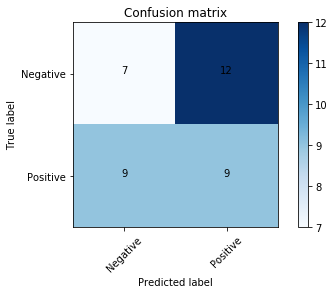

In [9]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pipeline_default_CountVec_MNB.fit(xtrain, ytrain)
y_pred = pipeline_default_CountVec_MNB.predict(xtest)

# compute the confusion matrix
confusion_mtx = confusion_matrix(ytest, y_pred) 
# plot the confusion matrix

plot_confusion_matrix(confusion_mtx,  classes = ['Negative', 'Positive'])

print(classification_report(ytest, y_pred))

In [10]:
ytest = np.array(ytest)
ypred = np.array(y_pred)
xtest = np.array(xtest)

ytest
ypred

err_cnt = 0
for i in range(0, len(xtest)):
    if(ytest[i]=='negative' and ypred[i]=='positive'):
        print(xtest[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)



errors: 0


In [11]:
# Your code starts here

vect = CountVectorizer(stop_words= 'english')
xtrain1 = vect.fit_transform(xtrain)
xtest1 = vect.transform(xtest)
mnb = MultinomialNB()
mnb.fit(xtrain1, ytrain)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
# Your code starts here
ratios = (mnb.feature_log_prob_[0]/mnb.feature_log_prob_[1])
feature_ranks = sorted(zip(ratios,unigram_count_vectorizer.get_feature_names()))
botton_features = feature_ranks[0:15]
top_features = feature_ranks[-15
                             :]
print("Top Features:")
[print(x[0],x[1]) for x in reversed(top_features) ]

print("Bottom Features:")
[print(x[0],x[1]) for x in botton_features]

Top Features:
1.2957824322962994 best
1.258054254265893 right
1.258054254265893 meal
1.258054254265893 friendly
1.258054254265893 came
1.1631664765475858 took
1.1631664765475858 terrible
1.1631664765475858 table
1.1631664765475858 service
1.1631664765475858 quality
1.1631664765475858 prices
1.1631664765475858 order
1.1631664765475858 nice
1.1631664765475858 life
1.1631664765475858 just
Bottom Features:
0.7536058518074356 don
0.8612496532657566 delicious
0.8612496532657566 dinner
0.8612496532657566 dishes
0.8612496532657566 environment
0.8612496532657566 experience
0.8612496532657566 food
0.8612496532657566 friends
0.8612496532657566 like
0.8612496532657566 little
0.8612496532657566 try
0.8612496532657566 waiter
0.8612496532657566 went
0.8732509317096887 people
0.9127614151100819 definitely


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]